<a href="https://colab.research.google.com/github/duTianze/machine-learning/blob/master/%E2%80%9CBad_CNN_Mnist%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Model,Sequential
from keras.layers import Dense, Input,Conv2D,MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt

# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(x_train, _), (x_test, y_test) = mnist.load_data()

# data pre-processing
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [33]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

# Flatten encoding for visualization
autoencoder.add(Flatten())#output 128
autoencoder.add(Dense(2, activation='relu'))
autoencoder.add(Dense(128, activation='relu'))
autoencoder.add(Reshape((4, 4, 8)))

# Decoder Layers
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_6 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 258       
__________

In [34]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('dense_35').output)
#encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[10].output)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37_input (InputLayer) (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_6 (Flatten)          (None, 128)               0         
__________

In [56]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                nb_epoch=20,
                batch_size=256,
                shuffle=True,
               validation_data=(x_test, x_test),
               )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 121us/step - loss: -5.9531 - val_loss: -5.9232
Epoch 2/20
60000/60000 [==============================] - 5s 78us/step - loss: -5.9531 - val_loss: -5.9232
Epoch 3/20
60000/60000 [==============================] - 5s 77us/step - loss: -5.9531 - val_loss: -5.9232
Epoch 4/20
60000/60000 [==============================] - 5s 77us/step - loss: -5.9531 - val_loss: -5.9232
Epoch 5/20
60000/60000 [==============================] - 5s 77us/step - loss: -5.9531 - val_loss: -5.9232
Epoch 6/20
60000/60000 [==============================] - 5s 77us/step - loss: -5.9531 - val_loss: -5.9232
Epoch 7/20
60000/60000 [==============================] - 5s 76us/step - loss: -5.9531 - val_loss: -5.9232
Epoch 8/20
60000/60000 [==============================] - 5s 76us/step - loss: -5.9531 - val_loss: -5.9232
Epoch 9/20
60000/60000 [==============================] - 5s 78us/step - loss: -5.9531 - val_

In [0]:
# plotting
encoded_imgs = encoder.predict(x_test)

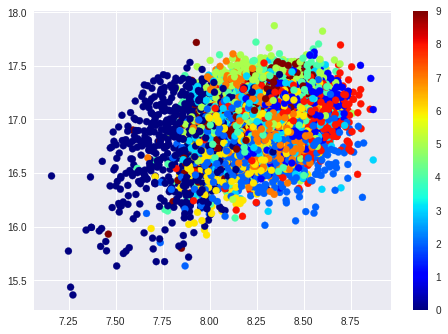

In [58]:
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test[:], cmap=plt.cm.jet)
plt.colorbar()
plt.show()

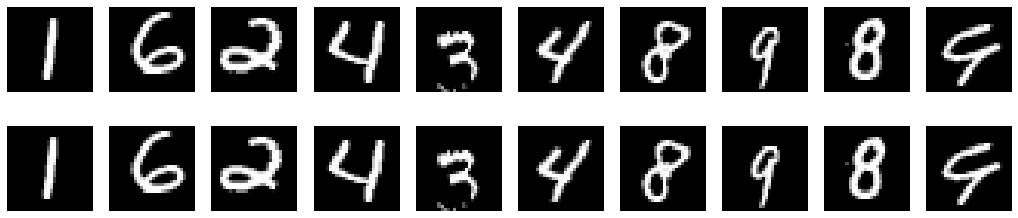

In [59]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

x_test_result = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()